In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression as LR

In [10]:
Raw_data = pd.read_csv("1.04. Real-life example.csv")
Raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [11]:
Raw_data.shape

(4345, 9)

In [13]:
Raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [16]:
D1 = Raw_data.drop("Model",axis=1)
D1.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [17]:
D1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [19]:
D1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [22]:
D2 = D1.dropna(axis = 0)
D2.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [23]:
D2.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


Exploring the probability Distribution Function

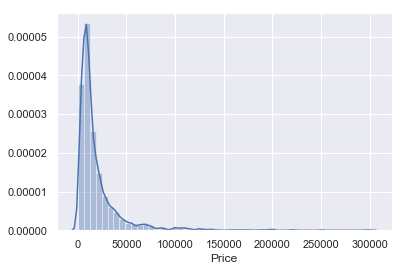

In [42]:
sns.distplot(D2["Price"])

In [43]:
quant = D2["Price"].quantile(0.99)
print(quant)
D3 = D2[D2["Price"] < quant]
D3.describe(include = "all")

129812.51999999981


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


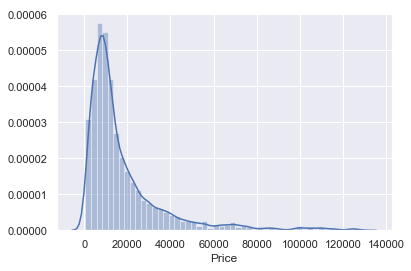

In [44]:
sns.distplot(D3["Price"])

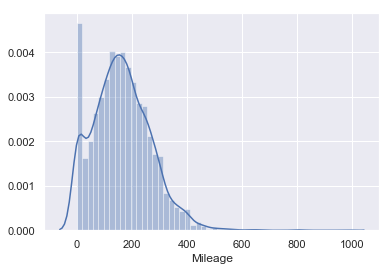

In [45]:
sns.distplot(D2["Mileage"])

In [46]:
quant2 = D3["Mileage"].quantile(0.99)
D4 = D3[D3["Mileage"] < quant2]
D4.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


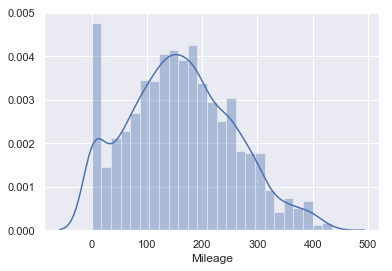

In [47]:
sns.distplot(D4["Mileage"])

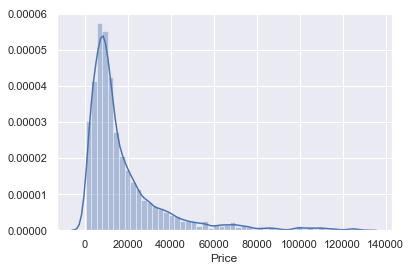

In [48]:
sns.distplot(D4["Price"])

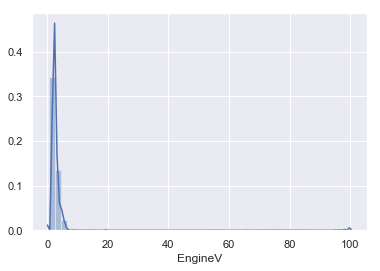

In [49]:
sns.distplot(D4["EngineV"])

In [53]:
quant3 = D4["EngineV"].quantile(0.99)
D5 = D4[D4["EngineV"] < quant3]
D5.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


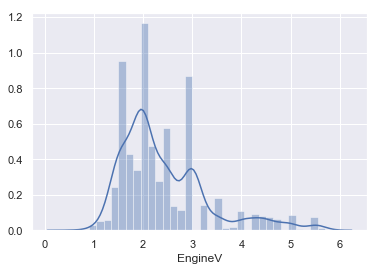

In [54]:
sns.distplot(D5["EngineV"])

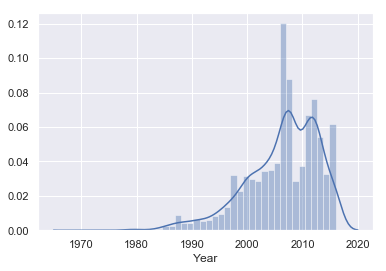

In [55]:
sns.distplot(D5["Year"])

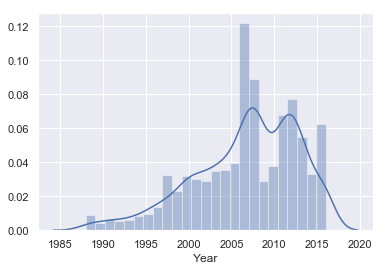

In [58]:
quant4 = D5["Year"].quantile(0.01)
D6 = D5[D5["Year"] > quant4]
sns.distplot(D6["Year"])

In [59]:
data_cleaned = D6.reset_index(drop=True)

In [61]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


In [63]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["Log_Price"] = log_price
data_cleaned.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [65]:
data_cleaned = data_cleaned.drop("Price",axis=1)

In [66]:
data_cleaned.head(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [67]:
data_cleaned = data_cleaned.drop("Year",axis=1)
data_cleaned.head(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [68]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)


In [70]:
data_with_dummies.head(5)


,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [71]:
data_with_dummies.describe(include="all")

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,160.860156,2.424310,9.408321,0.161979,0.191406,0.078646,0.112500,0.129688,0.220833,0.065885,0.094531,0.377865,0.096875,0.158854,0.147917,0.025521,0.356250,0.905729
std,95.742943,0.899824,0.873615,0.368480,0.393459,0.269220,0.316022,0.336003,0.414862,0.248114,0.292604,0.484917,0.295826,0.365588,0.355064,0.157721,0.478953,0.292243
min,0.000000,0.600000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,1.800000,8.881836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,157.500000,2.200000,9.352272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,226.000000,3.000000,9.975808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,435.000000,5.700000,11.769287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
data_with_dummies.isnull().sum()

Mileage                0
EngineV                0
Log_Price              0
Brand_BMW              0
Brand_Mercedes-Benz    0
Brand_Mitsubishi       0
Brand_Renault          0
Brand_Toyota           0
Brand_Volkswagen       0
Body_hatch             0
Body_other             0
Body_sedan             0
Body_vagon             0
Body_van               0
Engine Type_Gas        0
Engine Type_Other      0
Engine Type_Petrol     0
Registration_yes       0
dtype: int64

In [74]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [75]:
cols = ['Log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [76]:
Final_data = data_with_dummies[cols]

In [77]:
Final_data.head(5)

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [79]:
y = Final_data["Log_Price"]
x = Final_data.drop(["Log_Price"],axis=1)

In [81]:
from sklearn.preprocessing import StandardScaler as SS
Scaler = SS()
Scaler.fit(x)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
x_scaled = Scaler.transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [86]:
reg = LR()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
reg.score(x_train,y_train)

0.7530570002483704

In [90]:
y_hat = reg.predict(x_train)

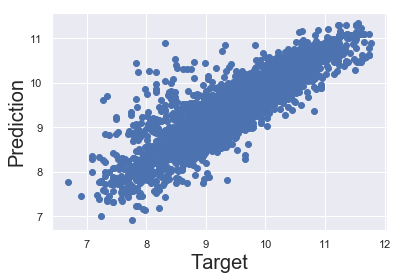

In [93]:
plt.scatter(y_train,y_hat)
plt.xlabel("Target",fontsize=20)
plt.ylabel("Prediction",fontsize=20)
plt.show()

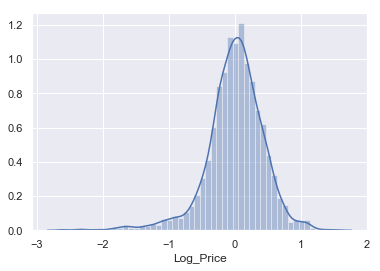

In [94]:
sns.distplot(y_train - y_hat)


In [96]:
reg.score(x_train,y_train)

0.7530570002483704

In [98]:
reg.intercept_

9.412833447016478

In [99]:
reg.coef_

array([-0.45617436,  0.22605477,  0.0099362 ,  0.00635261, -0.13778812,
       -0.17638126, -0.05470873, -0.08743586, -0.13877431, -0.091966  ,
       -0.19138808, -0.12150762, -0.15546017, -0.13000643, -0.03103934,
       -0.14930045,  0.31834531])

In [102]:
reg_summary = pd.DataFrame(x.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.456174
1,EngineV,0.226055
2,Brand_BMW,0.009936
3,Brand_Mercedes-Benz,0.006353
4,Brand_Mitsubishi,-0.137788
5,Brand_Renault,-0.176381
6,Brand_Toyota,-0.054709
7,Brand_Volkswagen,-0.087436
8,Body_hatch,-0.138774
9,Body_other,-0.091966


In [103]:
y_hat_test = reg.predict(x_test)

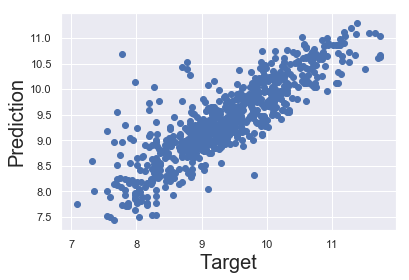

In [104]:
plt.scatter(y_test,y_hat_test)
plt.xlabel("Target",fontsize=20)
plt.ylabel("Prediction",fontsize=20)
plt.show()

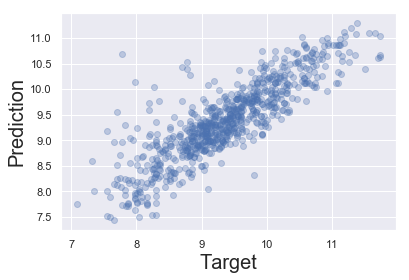

In [105]:
plt.scatter(y_test,y_hat_test,alpha=0.3)
plt.xlabel("Target",fontsize=20)
plt.ylabel("Prediction",fontsize=20)
plt.show()

In [110]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_pf.head(5)

,Prediction
0,28900.261353
1,42695.054176
2,3650.481935
3,11074.752981
4,11094.645963


In [112]:
df_pf["Actual"] = y_test
df_pf.head(5)

,Prediction,Actual
0,28900.261353,8.34284
1,42695.054176,NaN
2,3650.481935,NaN
3,11074.752981,NaN
4,11094.645963,NaN


In [127]:
y_test
y_test.reset_index(drop=True,inplace=True)

In [128]:
df_pf["Actual"] = np.exp(y_test)
df_pf.head(5)

,Prediction,Actual
0,28900.261353,41500.0
1,42695.054176,125000.0
2,3650.481935,5000.0
3,11074.752981,9999.0
4,11094.645963,8900.0


In [129]:
df_pf["Residue"] = df_pf["Actual"] - df_pf["Prediction"]
df_pf["Diff%"] = np.absolute(df_pf["Residue"]/df_pf["Actual"]*100)
df_pf.head(5)

,Prediction,Actual,Residue,Diff%
0,28900.261353,41500.0,12599.738647,30.360816
1,42695.054176,125000.0,82304.945824,65.843957
2,3650.481935,5000.0,1349.518065,26.990361
3,11074.752981,9999.0,-1075.752981,10.758606
4,11094.645963,8900.0,-2194.645963,24.658943


In [130]:
df_pf.describe()

,Prediction,Actual,Residue,Diff%
count,768.000000,768.000000,768.000000,768.000000
mean,15701.730567,16928.424531,1226.693964,39.154030
std,12624.180103,17521.839532,10045.907834,86.826838
min,1715.361758,1199.000000,-41533.373814,0.070006
25%,7528.926017,6800.000000,-2372.734013,9.821921
50%,11436.737550,11250.000000,-36.120170,23.026701
75%,19213.378480,20400.000000,2776.653594,41.468524
max,79463.516115,125000.000000,84097.289451,1730.557242


In [131]:
df_pf.sort_values(by="Diff%")

,Prediction,Actual,Residue,Diff%
668,13009.100796,13000.0,-9.100796,0.070006
187,24866.346638,24900.0,33.653362,0.135154
318,3104.412101,3100.0,-4.412101,0.142326
463,3494.876779,3500.0,5.123221,0.146378
39,10475.623981,10500.0,24.376019,0.232153
353,12331.560736,12300.0,-31.560736,0.256591
163,42630.540545,42500.0,-130.540545,0.307154
420,2890.613813,2900.0,9.386187,0.323662
92,12458.184170,12499.0,40.815830,0.326553
714,25106.542447,24999.0,-107.542447,0.430187
